## Module 5

In this assignment, you are going to work on Histograms and Scatterplots.

We have preprocessed the data as "df" for you. 

Follow the instructions and finish the rest part.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
import imp, os, sys
sol = imp.load_compiled("solutions", "./solutions.py")
sol.get_solutions("imdb.xlsx")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

In [2]:
# Loading the data
import pandas as pd
import numpy as np

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

print("Finished.")

Finished.


In [3]:
df

movie_title  director_id  country_id content_rating  \
0    The Shawshank Redemption           34           1              R   
1              The Green Mile           34           1              R   
2               The Godfather           33           1              R   
3      The Godfather: Part II           33           1              R   
4              Apocalypse Now           33           1              R   
..                        ...          ...         ...            ...   
173        Dancer in the Dark           66          13              R   
174           Pan's Labyrinth           42          17              R   
175            The Sea Inside            2          17          PG-13   
176  The Secret in Their Eyes           61          16              R   
177        Mad Max: Fury Road           39          19              R   

     title_year  imdb_score      gross  duration  id_x    country  id_y  \
0          1994         9.3   28341469       142     1        USA    34   
1          1999         8.5  136801374       189     1        USA    34   
2          1972         9.2  134821952       175     1        USA    33   
3          1974         9.0   57300000       220     1        USA    33   
4          1979         8.5   78800000       289     1        USA    33   
..          ...         ...        ...       ...   ...        ...   ...   
173        2000         8.0    4157491       140    13    Denmark    66   
174        2006         8.2   37623143       112    17      Spain    42   
175        2004         8.1    2086345       125    17      Spain     2   
176        2009         8.2   20167424       129    16  Argentina    61   
177        2015         8.1  153629485       120    19  Australia    39   

            director_name  
0          Frank Darabont  
1          Frank Darabont  
2    Francis Ford Coppola  
3    Francis Ford Coppola  
4    Francis Ford Coppola  
..                    ...  
173        Lars von Trier  
174    Guillermo del Toro  
175    Alejandro Amenabar  
176  Juan Jose Campanella  
177         George Miller  

[178 rows x 12 columns]

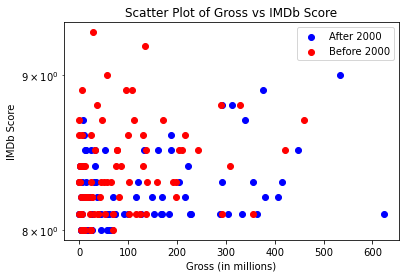

My verdict: There doesn't seem to be a strong correlation between gross and IMDb score.


In [4]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1

# your code here
import matplotlib.pyplot as plt1
# Create dataframes for movies after and before 2000
df_after_2000 = df[df['title_year'] >= 2000]
df_before_2000 = df [df['title_year'] < 2000]

# Divide the gross amount by 1,000,000
df_after_2000.loc[:, 'gross'] = (df_after_2000['gross'] / 1000000).astype(int)
df_before_2000.loc[:,'gross'] = (df_before_2000['gross'] / 1000000).astype(int)

# Create scatter plot
plt1.scatter(df_after_2000['gross'], df_after_2000['imdb_score'], color='blue', label='After 2000') 
plt1.scatter(df_before_2000['gross'], df_before_2000['imdb_score'], color='red', label='Before 2000')

# Set labels and legend
plt1.xlabel ('Gross (in millions)')
plt1.ylabel ('IMDb Score')
plt1.legend ()

# Set the y-axis to a logarithmic scale
plt1.yscale('log' )

# Set title
plt1. title('Scatter Plot of Gross vs IMDb Score')

plt1.show()

# Print your verdict
print("My verdict: There doesn't seem to be a strong correlation between gross and IMDb score.")

sol.df_before_2000.loc[:,'gross'] = (sol.df_before_2000['gross'] / 1000000). astype (int)
sol.df_after_2000.loc[:,'gross'] = (sol.df_after_2000['gross'] / 1000000). astype (int)


In [5]:
assert_frame_equal(df_before_2000, sol.df_before_2000)
assert_frame_equal(df_after_2000, sol.df_after_2000)
np.testing.assert_array_equal(plt1, sol.plt1)
print("Success!")

Success!


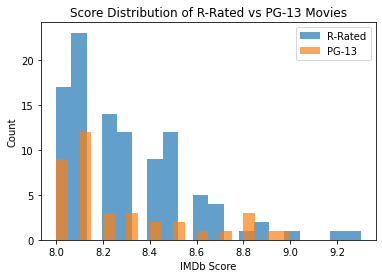

In [6]:
"""Q2: 
Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.
Describe your plot. 

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2

# your code here

# Separate R-Rated and PG-13 movies
df_R = df[df['content_rating'] == 'R']
df_PG13 = df[df['content_rating'] == 'PG-13']

df_R['gross'] = df_R['gross'].astype(int)
df_PG13['gross'] = df_PG13['gross'].astype(int)

# Create histograms
plt2.hist(df_R['imdb_score'], alpha=0.7, label='R-Rated', bins=20)
plt2.hist(df_PG13['imdb_score'], alpha=0.7, label='PG-13', bins=20)

# Add labels and legend
plt2.xlabel('IMDb Score')
plt2.ylabel('Count')
plt2.legend()

# Set title
plt2.title('Score Distribution of R-Rated vs PG-13 Movies')

# Show the plot
plt2.show()

# Save the plot in a variable
#plt2 = plt


plt2.show()


sol.df_R.loc[:,'gross'] = (sol.df_R['gross'])
sol.df_PG13.loc[:,'gross'] = (sol.df_PG13['gross'])


In [7]:
assert_frame_equal(df_R, sol.df_R)
assert_frame_equal(df_PG13, sol.df_PG13)
np.testing.assert_array_equal(plt2, sol.plt2)
print("Success!")

Success!
